In [30]:
import numpy as np
import matplotlib.pyplot as plt
from gradient_free_optimizers import ParticleSwarmOptimizer

In [31]:
def objective_function(pos_new):
    score = -(pos_new["x1"] * pos_new["x1"] + pos_new["x2"] * pos_new["x2"])
    return score


search_space = {"x1": np.arange(-10, 11, 1), "x2": np.arange(-10, 11, 1)}

In [32]:
opt_vertices = ParticleSwarmOptimizer(search_space, rand_rest_p=0.05)
opt_vertices.search(objective_function, n_iter=4, initialize={"vertices": 4})

opt_grid = ParticleSwarmOptimizer(search_space, rand_rest_p=0.05)
opt_grid.search(objective_function, n_iter=8, initialize={"grid": 8})


Results: 'objective_function'  
   Best score: -200  
   Best parameter:
      'x1' 10  
      'x2' 10  
   Evaluation time   : 4.267692565917969e-05 sec    [6.45 %]
   Optimization time : 0.0006186962127685547 sec    [93.55 %]
   Iteration time    : 0.0006613731384277344 sec    [6048.02 iter/sec]

Results: 'objective_function'  
   Best score: -5  
   Best parameter:
      'x1' 2  
      'x2' -1  
   Evaluation time   : 7.581710815429688e-05 sec    [3.78 %]
   Optimization time : 0.00193023681640625 sec    [96.22 %]
   Iteration time    : 0.002006053924560547 sec    [3987.93 iter/sec]


In [33]:
values_vertices = opt_vertices.results[search_space.keys()].values
scores_vertices = opt_vertices.results["score"].values

values_grid = opt_grid.results[search_space.keys()].values
scores_grid = opt_grid.results["score"].values

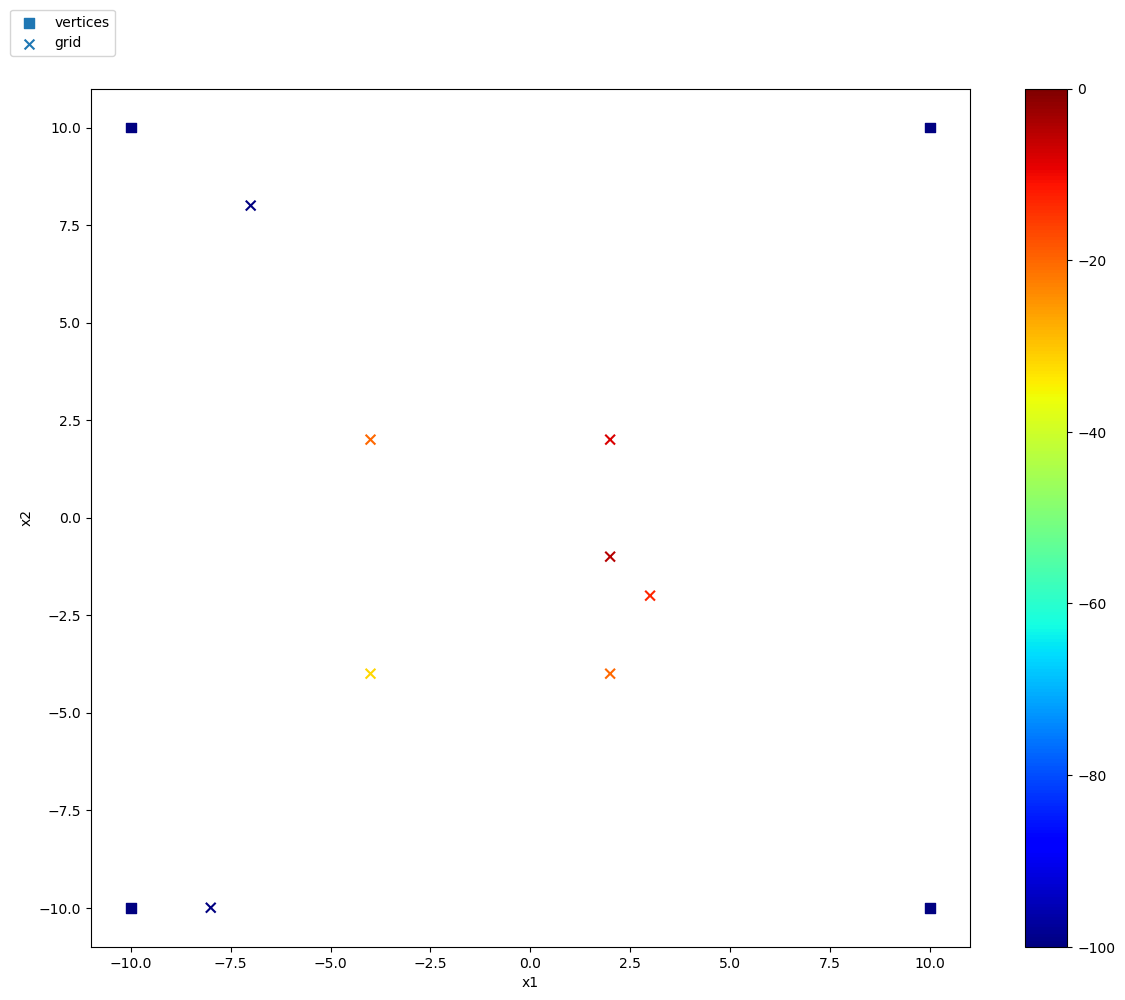

In [46]:
plt.figure(figsize=(12, 10), dpi=100)
plt.set_cmap("jet")

plt.scatter(
    values_vertices[:, 0],
    values_vertices[:, 1],
    c=scores_vertices,
    marker="s",
    s=50,
    vmin=-100,
    vmax=0,
    label="vertices",
)


plt.scatter(
    values_grid[:, 0],
    values_grid[:, 1],
    c=scores_grid,
    marker="x",
    s=50,
    vmin=-100,
    vmax=0,
    label="grid",
)

plt.xlabel("x1")
plt.ylabel("x2")

plt.xlim((-11, 11))
plt.ylim((-11, 11))
plt.colorbar()
plt.legend(loc="upper left", bbox_to_anchor=(-0.10, 1.1))

plt.tight_layout()
plt.show()